In [1]:
import pandas as pxndx
datos = pxndx.read_csv("train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

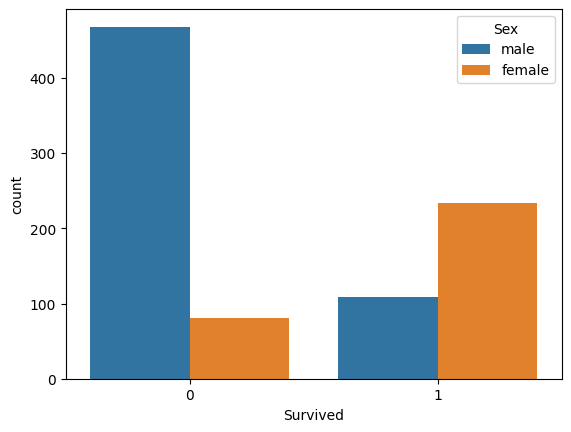

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos, hue="Sex")

In [5]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
datos["Age"].mean()

np.float64(29.69911764705882)

In [7]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [8]:
datos["Age"]= datos["Age"].fillna(datos["Age"].mean())

In [9]:
datos.isna().sum() #Ya no hay Ages vacios 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
datos = datos.drop(["Cabin"], axis=1)

In [11]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
datos = datos.dropna()

In [13]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
datos = datos.drop(["Name","PassengerId", "Ticket"], axis=1)

In [15]:
dummies_sex = pxndx.get_dummies(datos["Sex"], drop_first=True)


In [16]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

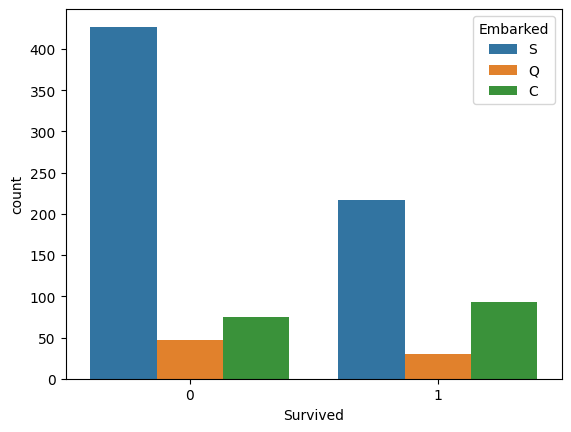

In [17]:
sb.countplot(x="Survived",data=datos, hue="Embarked")

In [18]:
dummies_embarked = pxndx.get_dummies(datos["Embarked"],drop_first=True)

In [19]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

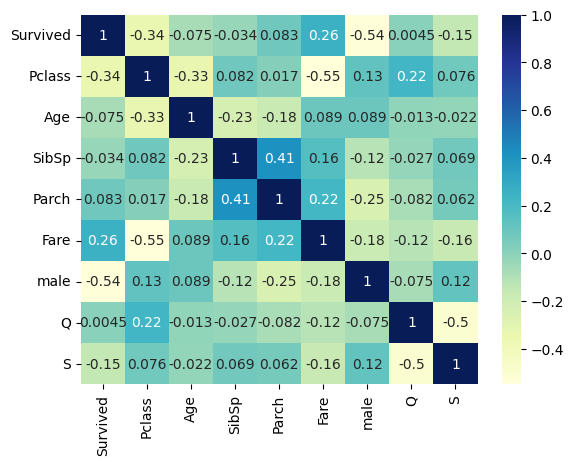

In [20]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

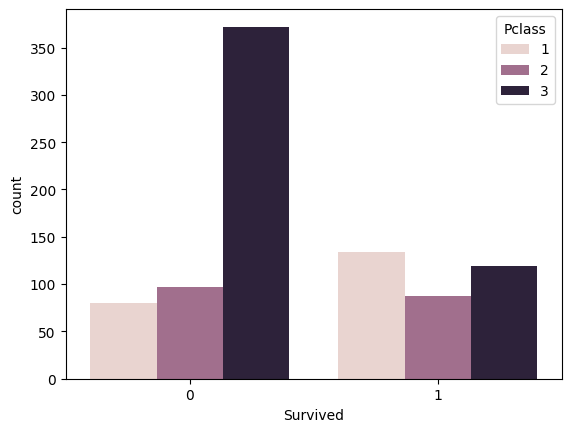

In [21]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [22]:
x= datos.drop(["Survived"], axis=1)
y= datos["Survived"]

In [23]:
from sklearn.model_selection import train_test_split
x_entr, x_pru, y_entr,y_pru = train_test_split(x,y,test_size=.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(x_entr,y_entr)
predicciones = modelo.predict(x_pru)

In [29]:
from sklearn.tree import DecisionTreeClassifier

resultado = []
for i in range(1,15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(x_entr,y_entr)
    predicciones = modelo.predict(x_pru)
    exactitud = accuracy_score(y_pru,predicciones)
    print(f"Resultado para {i}: {exactitud}")
    resultado.append(exactitud)

Resultado para 1: 0.797752808988764
Resultado para 2: 0.7359550561797753
Resultado para 3: 0.8089887640449438
Resultado para 4: 0.7808988764044944
Resultado para 5: 0.7696629213483146
Resultado para 6: 0.7696629213483146
Resultado para 7: 0.7865168539325843
Resultado para 8: 0.7865168539325843
Resultado para 9: 0.797752808988764
Resultado para 10: 0.7921348314606742
Resultado para 11: 0.7808988764044944
Resultado para 12: 0.7865168539325843
Resultado para 13: 0.7865168539325843
Resultado para 14: 0.7808988764044944


<Axes: >

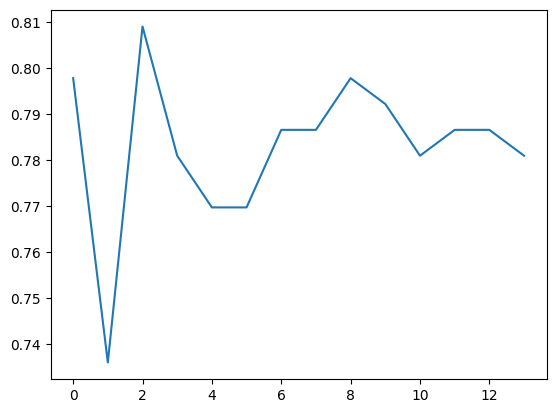

In [30]:
sb.lineplot(data=resultado)

In [31]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(x_entr,y_entr)
predicciones = modelo.predict(x_pru)
exactitud = accuracy_score(y_pru,predicciones)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       101
           1       0.82      0.60      0.69        77

    accuracy                           0.77       178
   macro avg       0.78      0.75      0.75       178
weighted avg       0.78      0.77      0.76       178



In [33]:
from sklearn.metrics import confusion_matrix
pxndx.DataFrame(confusion_matrix(y_pru,predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,91,10
Real: Si,31,46


In [36]:
x_entr.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.4847171532846715, 0.9444444444444444, 'male <= 0.5\n0.466\n711\n[448, 263]\nMurio'),
 Text(0.28056569343065696, 0.8333333333333334, 'Pclass <= 2.5\n0.403\n247\n[69, 178]\nVivio'),
 Text(0.38264142335766427, 0.8888888888888888, 'True  '),
 Text(0.11496350364963503, 0.7222222222222222, 'Age <= 3.0\n0.098\n135\n[7, 128]\nVivio'),
 Text(0.06569343065693431, 0.6111111111111112, 'Parch <= 1.5\n0.5\n2\n[1, 1]\nMurio'),
 Text(0.051094890510948905, 0.5, '0.0\n1\n[0, 1]\nVivio'),
 Text(0.08029197080291971, 0.5, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.16423357664233576, 0.6111111111111112, 'Fare <= 22.0\n0.086\n133\n[6, 127]\nVivio'),
 Text(0.10948905109489052, 0.5, 'Age <= 53.5\n0.225\n31\n[4, 27]\nVivio'),
 Text(0.0948905109489051, 0.3888888888888889, 'Fare <= 20.25\n0.18\n30\n[3, 27]\nVivio'),
 Text(0.058394160583941604, 0.2777777777777778, 'Age <= 37.0\n0.133\n28\n[2, 26]\nVivio'),
 Text(0.029197080291970802, 0.16666666666666666, 'Age <= 25.5\n0.087\n22\n[1, 21]\nVivio'),
 Text(0.0145985401

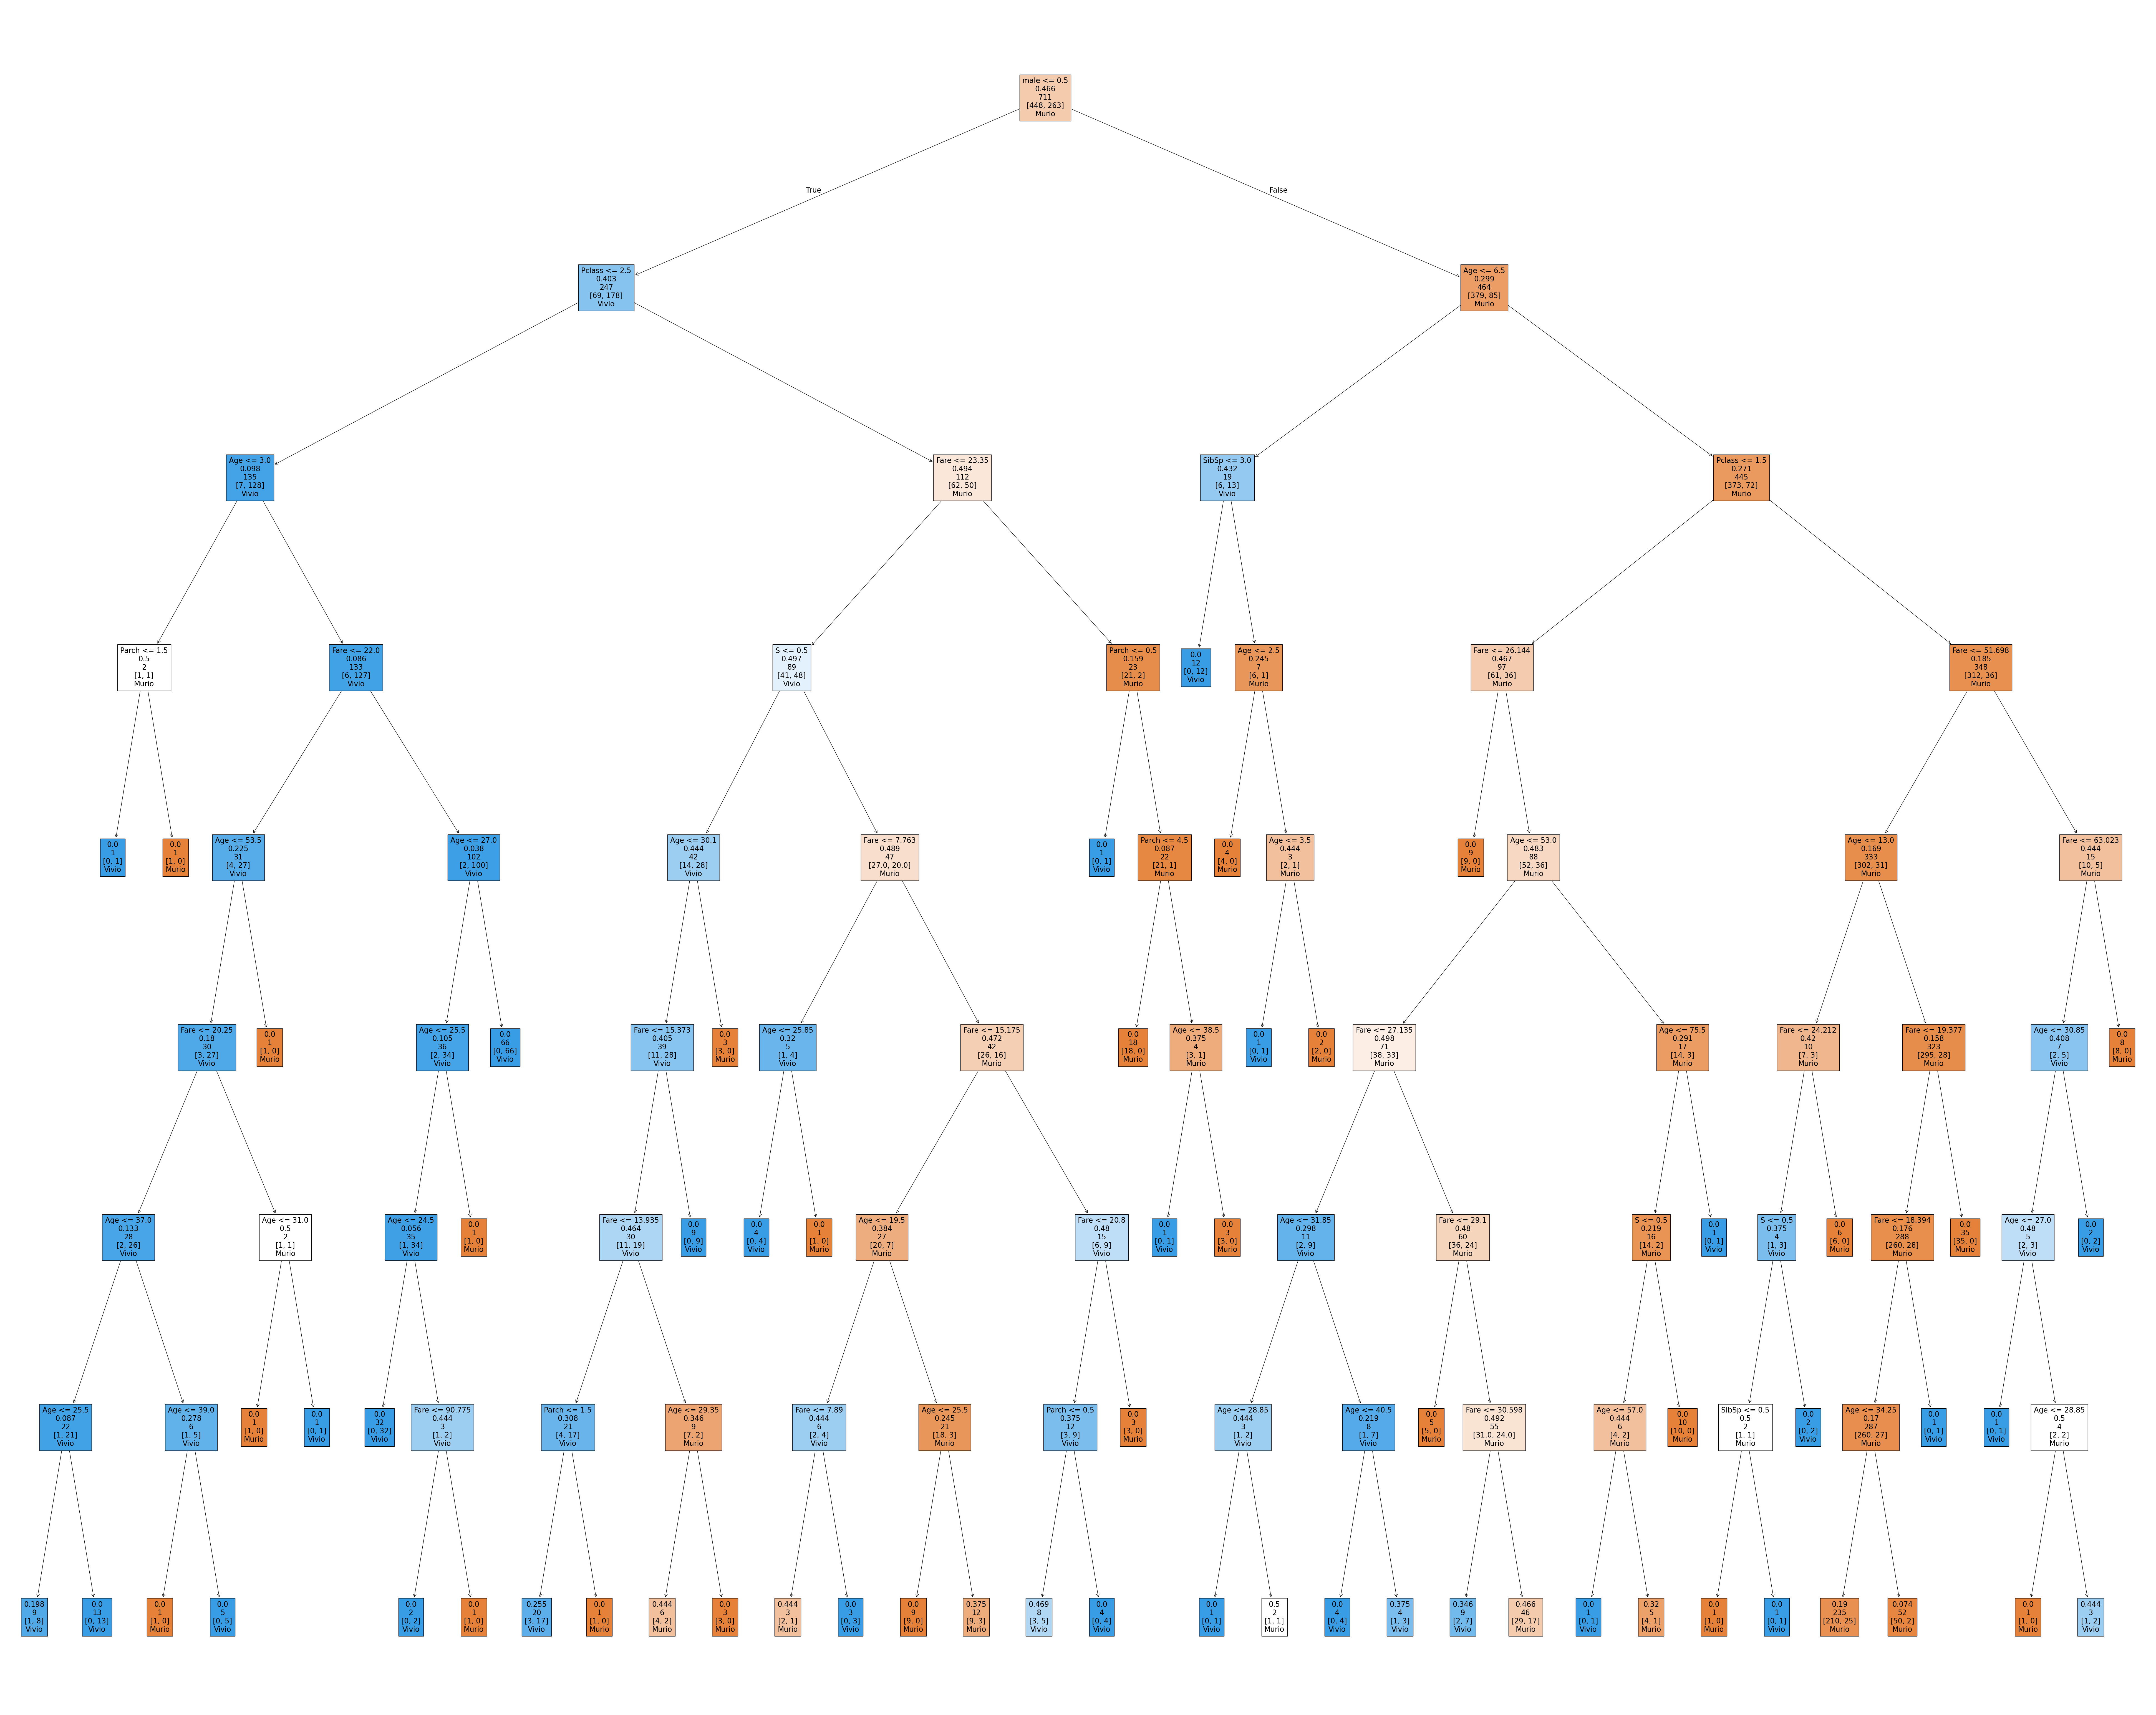

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names=x_entr.columns,
    class_names=["Murio","Vivio"],
    filled=True,label="none"
)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru,predicciones)

0.8146067415730337

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.78      0.70      0.74        66

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[99, 13],
       [20, 46]])

In [37]:
pxndx.DataFrame(confusion_matrix(y_pru,predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,99,13
Real: Si,20,46


In [38]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [59]:
nueva_persona= [3,22,0,0,500,1,0,0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
    print("Lo lograste")
else:
    print ("No lo lograste")

No lo lograste


c:\Users\MAPCO1720\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
